In [55]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imoporting the data
chiller_data=pd.read_csv("HVAC Energy Data.csv")

In [3]:
#checking the shape of the data
chiller_data.shape

(13615, 10)

In [4]:
# will check the first five rows of the data
chiller_data.head()

,Local Time (Timezone : GMT+8h),Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
0,8/18/2019 0:00,85.6,31.4,479.6,116.2,82,75,79,13,29.83
1,8/18/2019 0:30,84.3,31.1,460.3,114.5,82,75,79,12,29.83
2,8/18/2019 1:00,84.6,31.3,462.4,116.8,82,75,79,12,29.83
3,8/18/2019 1:30,84.8,31.4,458.5,117.0,82,75,79,12,29.83
4,8/18/2019 2:00,84.7,31.4,455.4,117.0,82,75,79,12,29.83


In [5]:
#chcking the Data type of the features
chiller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13615 entries, 0 to 13614
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Local Time (Timezone : GMT+8h)    13615 non-null  object 
 1   Chilled Water Rate (L/sec)        13615 non-null  float64
 2   Cooling Water Temperature (C)     13615 non-null  float64
 3   Building Load (RT)                13615 non-null  float64
 4   Chiller Energy Consumption (kWh)  13615 non-null  float64
 5   Outside Temperature (F)           13615 non-null  int64  
 6   Dew Point (F)                     13615 non-null  int64  
 7   Humidity (%)                      13615 non-null  int64  
 8   Wind Speed (mph)                  13615 non-null  int64  
 9   Pressure (in)                     13615 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.0+ MB


In [6]:
# lets check null values
chiller_data.isnull().sum()

Local Time (Timezone : GMT+8h)      0
Chilled Water Rate (L/sec)          0
Cooling Water Temperature (C)       0
Building Load (RT)                  0
Chiller Energy Consumption (kWh)    0
Outside Temperature (F)             0
Dew Point (F)                       0
Humidity (%)                        0
Wind Speed (mph)                    0
Pressure (in)                       0
dtype: int64

In [7]:
chiller_data['Local Time (Timezone : GMT+8h)']=pd.to_datetime(chiller_data['Local Time (Timezone : GMT+8h)'])
chiller_data['Local Time (Timezone : GMT+8h)'].head()

0   2019-08-18 00:00:00
1   2019-08-18 00:30:00
2   2019-08-18 01:00:00
3   2019-08-18 01:30:00
4   2019-08-18 02:00:00
Name: Local Time (Timezone : GMT+8h), dtype: datetime64[ns]

In [8]:
# extracting the year, month,day and hour from the date time column
chiller_data['year']=chiller_data['Local Time (Timezone : GMT+8h)'].dt.year
chiller_data['month']=chiller_data['Local Time (Timezone : GMT+8h)'].dt.month
chiller_data['day']=chiller_data['Local Time (Timezone : GMT+8h)'].dt.day
chiller_data['hour']=chiller_data['Local Time (Timezone : GMT+8h)'].dt.hour
chiller_data['Kwh/Tr']=chiller_data['Chiller Energy Consumption (kWh)']/chiller_data['Building Load (RT)']

In [9]:
chiller_data.head()

,Local Time (Timezone : GMT+8h),Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in),year,month,day,hour,Kwh/Tr
0,2019-08-18 00:00:00,85.6,31.4,479.6,116.2,82,75,79,13,29.83,2019,8,18,0,0.242285
1,2019-08-18 00:30:00,84.3,31.1,460.3,114.5,82,75,79,12,29.83,2019,8,18,0,0.248751
2,2019-08-18 01:00:00,84.6,31.3,462.4,116.8,82,75,79,12,29.83,2019,8,18,1,0.252595
3,2019-08-18 01:30:00,84.8,31.4,458.5,117.0,82,75,79,12,29.83,2019,8,18,1,0.255180
4,2019-08-18 02:00:00,84.7,31.4,455.4,117.0,82,75,79,12,29.83,2019,8,18,2,0.256917


In [10]:
# We will check that this data is for how many years
chiller_data['year'].value_counts()

year
2020    7220
2019    6395
Name: count, dtype: int64

In [11]:
# we will extract the avg energy consumption and avg outside temperature for 2019 and 2020
eng_cons_2019=chiller_data[chiller_data['year']==2019]['Chiller Energy Consumption (kWh)'].agg('mean')
eng_cons_2020=chiller_data[chiller_data['year']==2020]['Chiller Energy Consumption (kWh)'].agg('mean')
outside_temp_2019=chiller_data[chiller_data['year']==2019]['Outside Temperature (F)'].agg('mean')
outside_temp_2020=chiller_data[chiller_data['year']==2020]['Outside Temperature (F)'].agg('mean')

Text(0.5, 1.0, 'AVG Energy consumption for chiller for year 2019-2020')

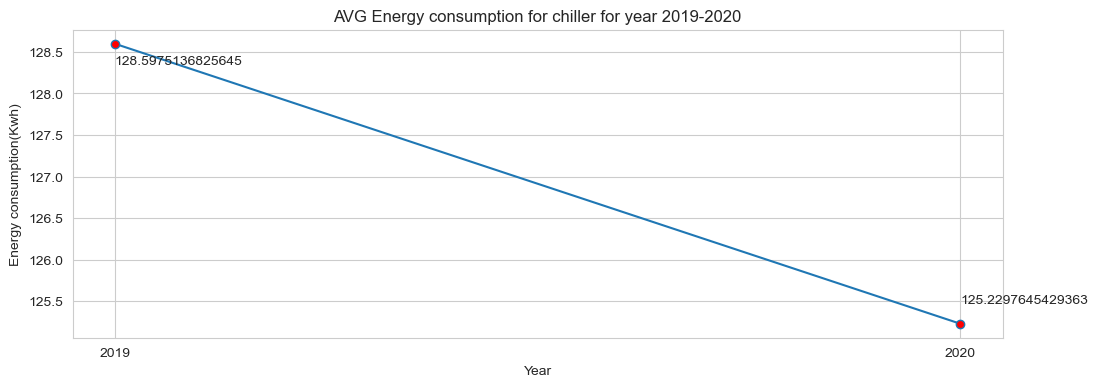

In [12]:
# we will plot the graphs
sbn.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(['2019','2020'],[eng_cons_2019,eng_cons_2020],marker='o',markerfacecolor='red')
plt.text('2019',eng_cons_2019-0.25,eng_cons_2019)
plt.text('2020',eng_cons_2020+0.25,eng_cons_2020)
plt.xlabel("Year")
plt.ylabel("Energy consumption(Kwh)")
plt.title("AVG Energy consumption for chiller for year 2019-2020")

Text(0.5, 1.0, 'AVG outside temperature for year 2019-2020')

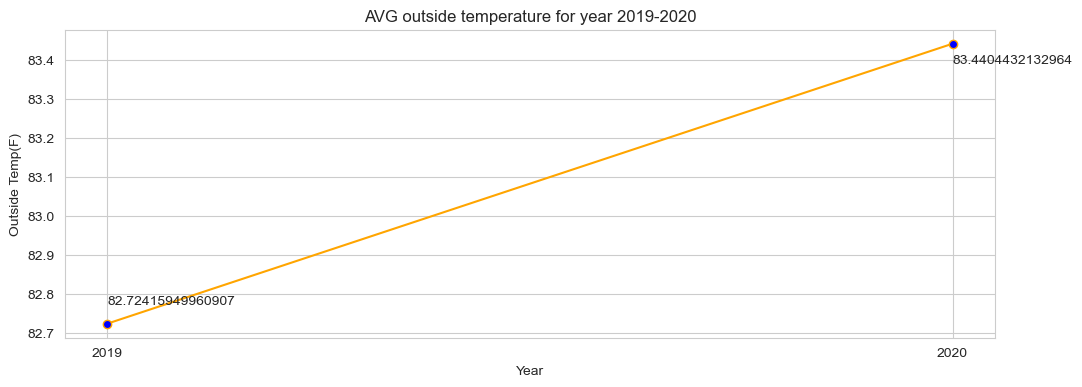

In [13]:
plt.figure(figsize=(12,4))
plt.plot(['2019','2020'],[outside_temp_2019,outside_temp_2020],marker='o',markerfacecolor='blue',color='orange')
plt.text('2019',outside_temp_2019+0.05,outside_temp_2019)
plt.text('2020',outside_temp_2020-0.05,outside_temp_2020)
plt.xlabel("Year")
plt.ylabel("Outside Temp(F)")
plt.title("AVG outside temperature for year 2019-2020")

##### From above graphs we can see that there is an increase in outside temperature by approximately 0.7F, still the Avg energy consuption has decreased by 3 units.
##### May be that has to do with the fact that 2020 was pandemic and chillers might not have been used as much

In [14]:
data_2019=chiller_data[chiller_data['year']==2019]
data_2020=chiller_data[chiller_data['year']==2020]
consumption_2019=pd.pivot_table(data_2019,index=['month'],
                        values=['Chiller Energy Consumption (kWh)'],aggfunc='sum')
consumption_2020=pd.pivot_table(data_2020,index=['month'],
                        values=['Chiller Energy Consumption (kWh)'],aggfunc='sum')
month_2019=pd.pivot_table(data_2019,index=['month'],
                        values=['Outside Temperature (F)'],aggfunc='mean')
month_2020=pd.pivot_table(data_2020,index=['month'],
                        values=['Outside Temperature (F)'],aggfunc='mean')
kwh_per_tr_2019=pd.pivot_table(data_2019,index=['month'],
                        values=['Kwh/Tr'],aggfunc='sum')
kwh_per_tr_2020=pd.pivot_table(data_2020,index=['month'],
                        values=['Kwh/Tr'],aggfunc='sum')

<AxesSubplot:xlabel='month', ylabel='Chiller Energy Consumption (kWh)'>

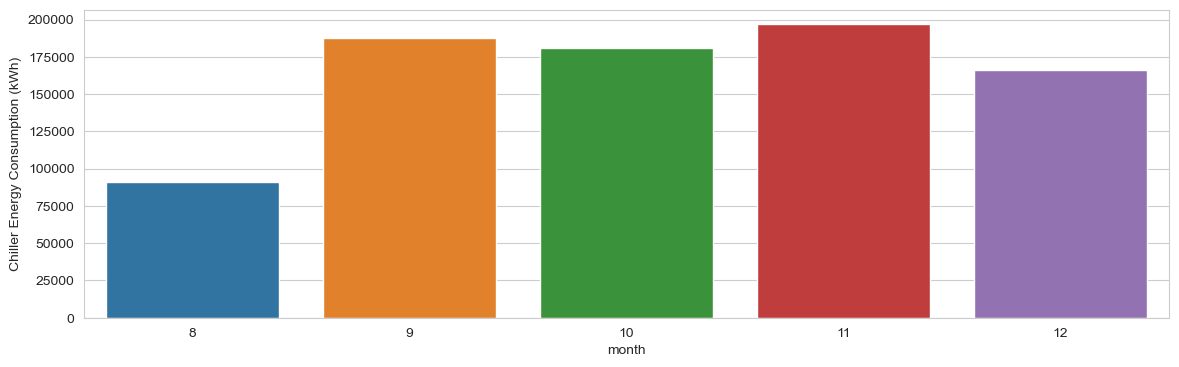

In [15]:
plt.figure(figsize=(14,4))
sbn.barplot(x=consumption_2019.index,y=consumption_2019['Chiller Energy Consumption (kWh)'])

<AxesSubplot:xlabel='month', ylabel='Kwh/Tr'>

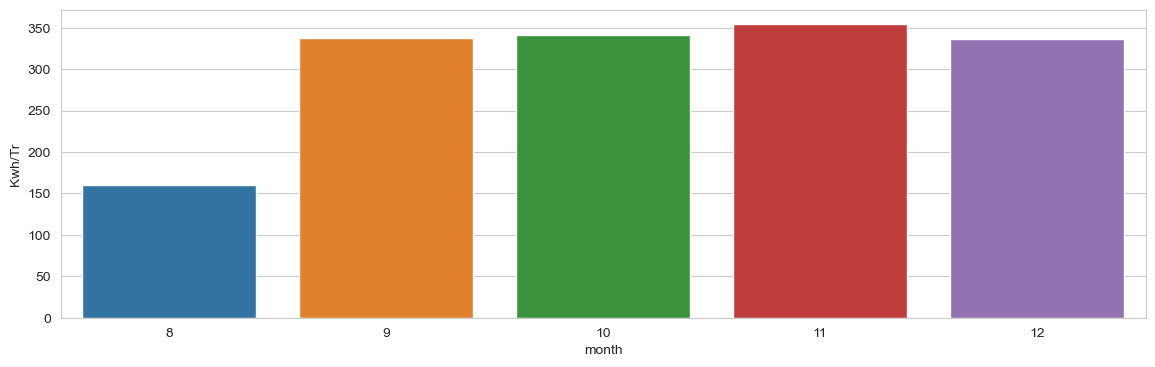

In [16]:
plt.figure(figsize=(14,4))
sbn.barplot(x=kwh_per_tr_2019.index,y=kwh_per_tr_2019['Kwh/Tr'])

<AxesSubplot:ylabel='Outside Temperature (F)'>

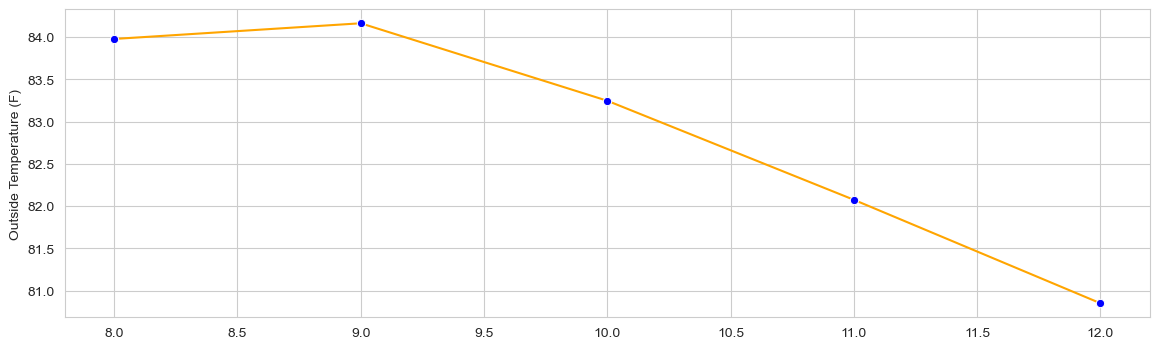

In [17]:
plt.figure(figsize=(14,4))
sbn.lineplot(x=[8,9,10,11,12],y=month_2019['Outside Temperature (F)'],marker='o',markerfacecolor='blue',color='orange')

<AxesSubplot:xlabel='month', ylabel='Chiller Energy Consumption (kWh)'>

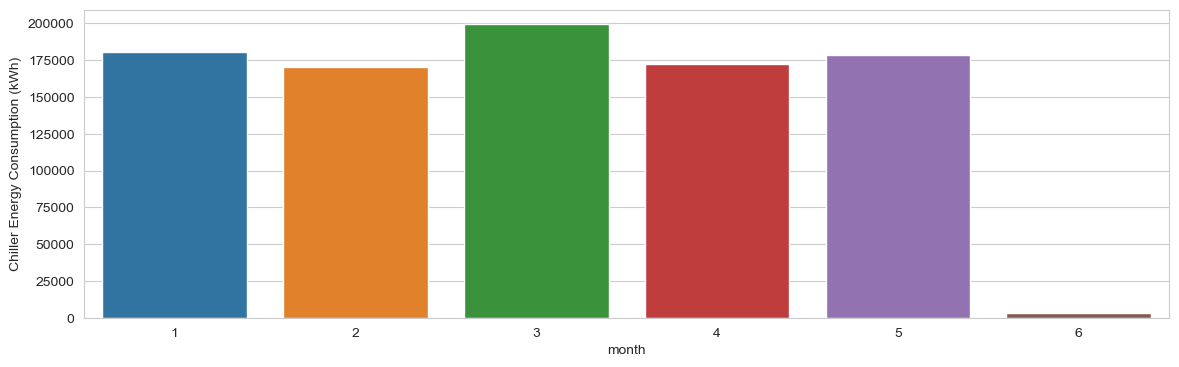

In [18]:
plt.figure(figsize=(14,4))
sbn.barplot(x=consumption_2020.index,y=consumption_2020['Chiller Energy Consumption (kWh)'])

<AxesSubplot:xlabel='month', ylabel='Kwh/Tr'>

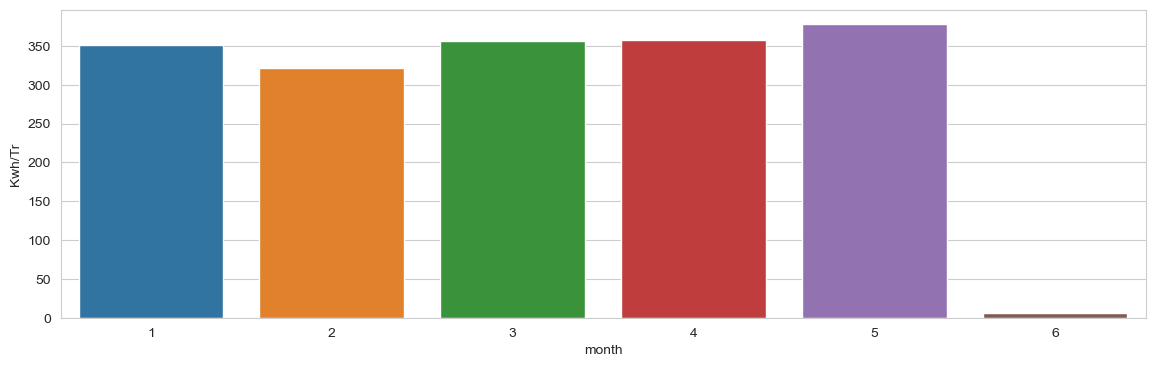

In [19]:
plt.figure(figsize=(14,4))
sbn.barplot(x=kwh_per_tr_2020.index,y=kwh_per_tr_2020['Kwh/Tr'])

<AxesSubplot:ylabel='Outside Temperature (F)'>

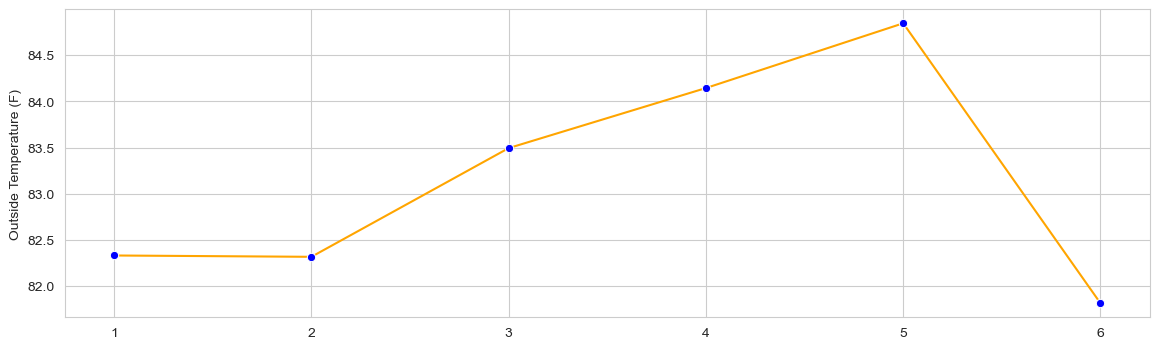

In [20]:
plt.figure(figsize=(14,4))
sbn.lineplot(x=[1,2,3,4,5,6],y=month_2020['Outside Temperature (F)'],marker='o',markerfacecolor='blue',color='orange')

#### From Above graphs we can see that , when tempreture is highest, the consumption is not the highest and interestingly in year 2020, though the consumption is highest in the month of march, kwh/tr is highest in the month of may

#### We will plot the lineplots for Kwh/TR, KWH consumption and building load for the month november just to observe the trend

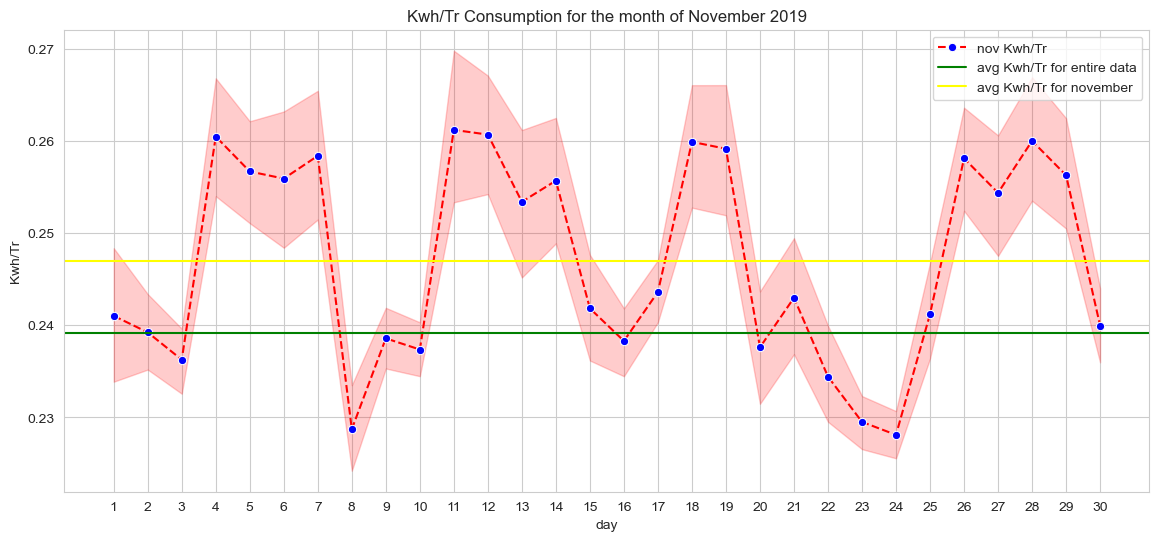

In [21]:
# We will plot kwh/Tr for month of November in 2019 and month of march in 2020 where the Kwh consumption is highest
kwh_2019=data_2019[data_2019['month']==11]
plt.figure(figsize=(14,6))
sbn.lineplot(x=kwh_2019['day'],y=kwh_2019['Kwh/Tr'],marker='o',markerfacecolor='blue',color='red',linestyle='dashed',label='nov Kwh/Tr')
plt.xticks([i for i in range(1,31,1)])
plt.axhline(data_2019[data_2019['month']!=8]['Kwh/Tr'].agg('mean'),color='green',label='avg Kwh/Tr for entire data')
plt.axhline(data_2019[data_2019['month']==11]['Kwh/Tr'].agg('mean'),color='yellow',label='avg Kwh/Tr for november')
plt.title("Kwh/Tr Consumption for the month of November 2019")
plt.legend(loc='upper right')

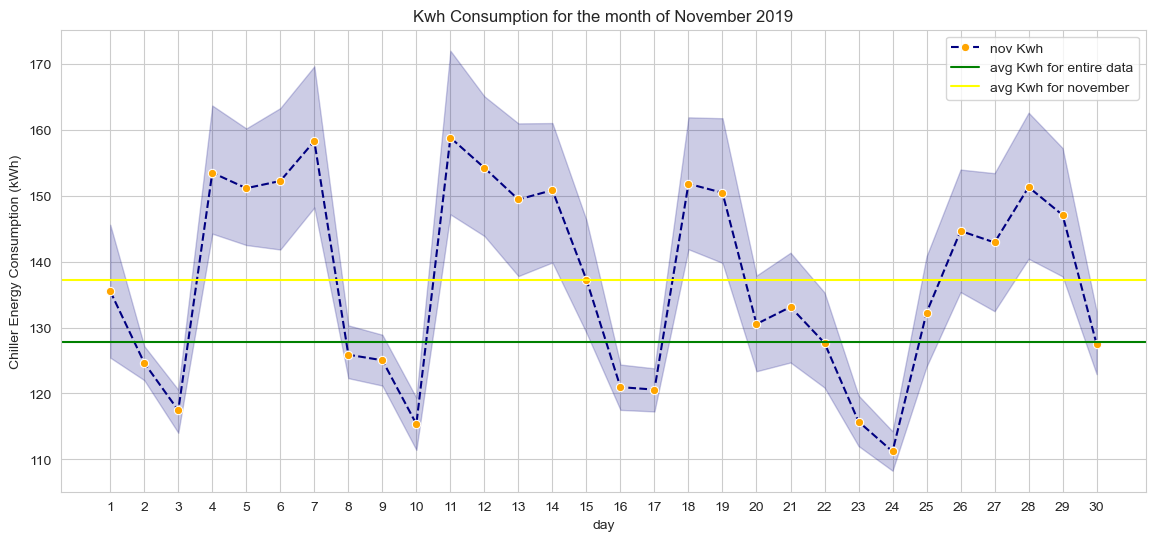

In [22]:
plt.figure(figsize=(14,6))
sbn.lineplot(x=kwh_2019['day'],y=kwh_2019['Chiller Energy Consumption (kWh)'],marker='o',markerfacecolor='orange',color='navy',linestyle='dashed',label='nov Kwh')
plt.xticks([i for i in range(1,31,1)])
plt.axhline(data_2019[data_2019['month']!=8]['Chiller Energy Consumption (kWh)'].agg('mean'),color='green',label='avg Kwh for entire data')
plt.axhline(data_2019[data_2019['month']==11]['Chiller Energy Consumption (kWh)'].agg('mean'),color='yellow',label='avg Kwh for november')
plt.title("Kwh Consumption for the month of November 2019")
plt.legend(loc='upper right')

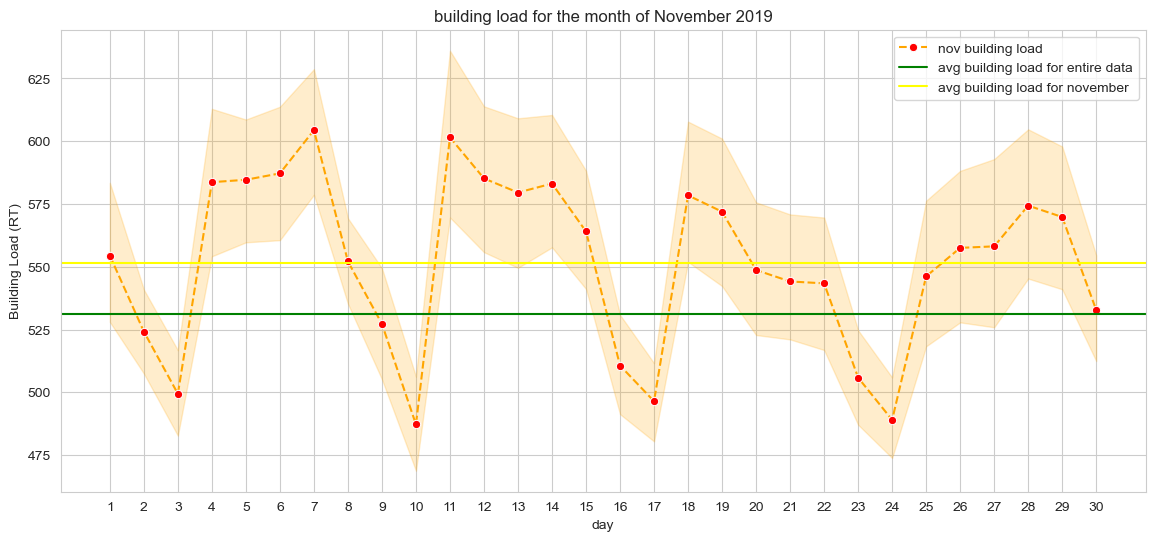

In [23]:
plt.figure(figsize=(14,6))
sbn.lineplot(x=kwh_2019['day'],y=kwh_2019['Building Load (RT)'],marker='o',markerfacecolor='red',color='orange',linestyle='dashed',label='nov building load')
plt.xticks([i for i in range(1,31,1)])
plt.axhline(data_2019[data_2019['month']!=8]['Building Load (RT)'].agg('mean'),color='green',label='avg building load for entire data')
plt.axhline(data_2019[data_2019['month']==11]['Building Load (RT)'].agg('mean'),color='yellow',label='avg building load for november')
plt.title("building load for the month of November 2019")
plt.legend(loc='upper right')

  ##### ------------------------------------------

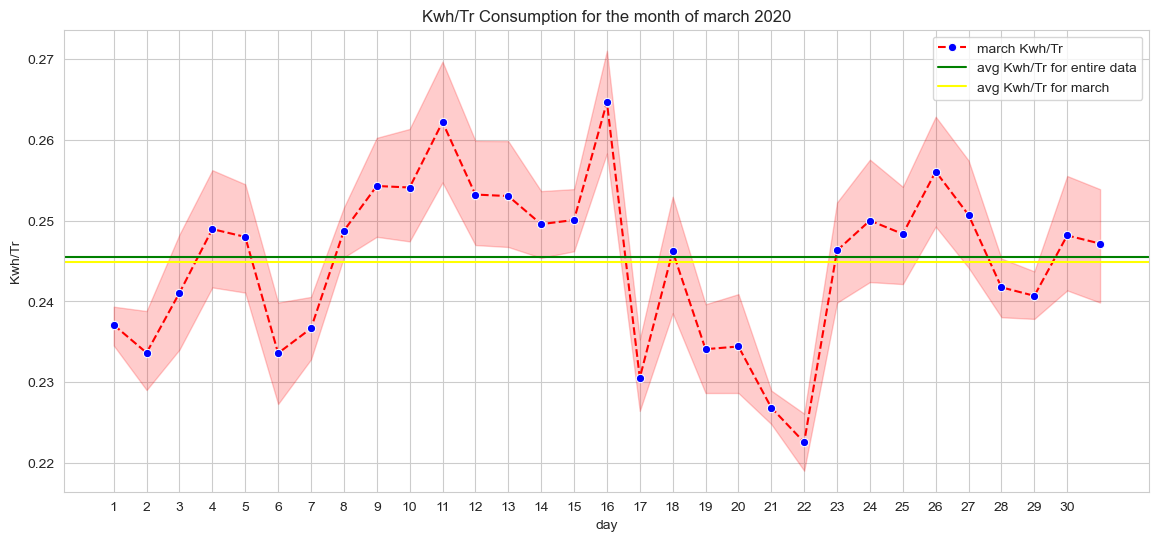

In [24]:

kwh_2020=data_2020[data_2020['month']==3]
plt.figure(figsize=(14,6))
sbn.lineplot(x=kwh_2020['day'],y=kwh_2020['Kwh/Tr'],marker='o',markerfacecolor='blue',color='red',linestyle='dashed',label='march Kwh/Tr')
plt.xticks([i for i in range(1,31,1)])
plt.axhline(data_2020[data_2020['month']!=6]['Kwh/Tr'].agg('mean'),color='green',label='avg Kwh/Tr for entire data')
plt.axhline(data_2020[data_2020['month']==3]['Kwh/Tr'].agg('mean'),color='yellow',label='avg Kwh/Tr for march')
plt.title("Kwh/Tr Consumption for the month of march 2020")
plt.legend(loc='upper right')

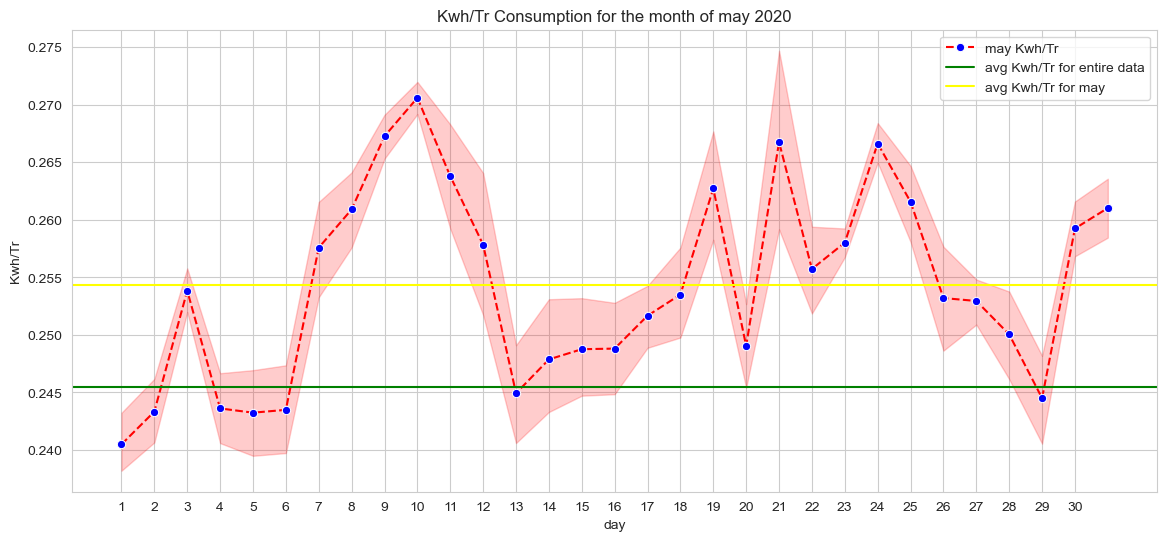

In [25]:

kwh_2020=data_2020[data_2020['month']==5]
plt.figure(figsize=(14,6))
sbn.lineplot(x=kwh_2020['day'],y=kwh_2020['Kwh/Tr'],marker='o',markerfacecolor='blue',color='red',linestyle='dashed',label='may Kwh/Tr')
plt.xticks([i for i in range(1,31,1)])
plt.axhline(data_2020[data_2020['month']!=6]['Kwh/Tr'].agg('mean'),color='green',label='avg Kwh/Tr for entire data')
plt.axhline(data_2020[data_2020['month']==5]['Kwh/Tr'].agg('mean'),color='yellow',label='avg Kwh/Tr for may')
plt.title("Kwh/Tr Consumption for the month of may 2020")
plt.legend(loc='upper right')

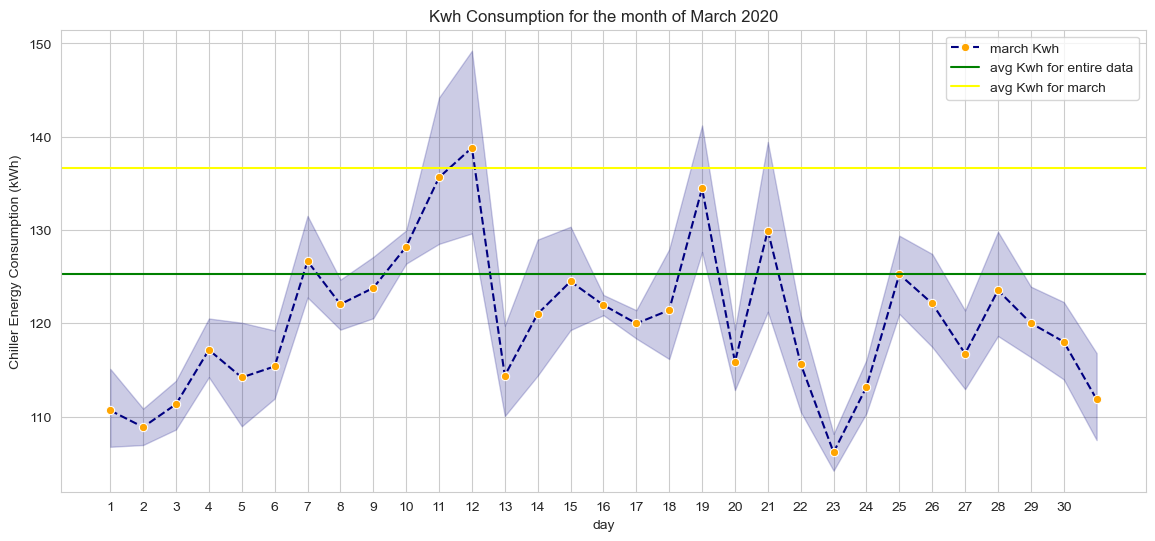

In [26]:
plt.figure(figsize=(14,6))
sbn.lineplot(x=kwh_2020['day'],y=kwh_2020['Chiller Energy Consumption (kWh)'],marker='o',markerfacecolor='orange',color='navy',linestyle='dashed',label='march Kwh')
plt.xticks([i for i in range(1,31,1)])
plt.axhline(data_2020[data_2020['month']!=6]['Chiller Energy Consumption (kWh)'].agg('mean'),color='green',label='avg Kwh for entire data')
plt.axhline(data_2020[data_2020['month']==3]['Chiller Energy Consumption (kWh)'].agg('mean'),color='yellow',label='avg Kwh for march')
plt.title("Kwh Consumption for the month of March 2020")
plt.legend(loc='upper right')

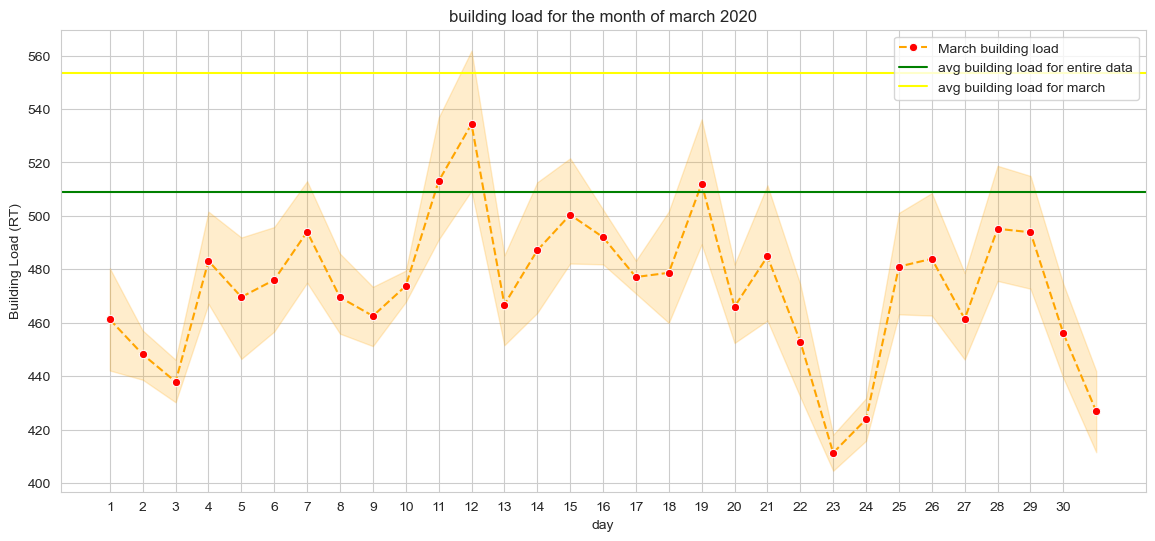

In [27]:
plt.figure(figsize=(14,6))
sbn.lineplot(x=kwh_2020['day'],y=kwh_2020['Building Load (RT)'],marker='o',markerfacecolor='red',color='orange',linestyle='dashed',label='March building load')
plt.xticks([i for i in range(1,31,1)])
plt.axhline(data_2020[data_2020['month']!=6]['Building Load (RT)'].agg('mean'),color='green',label='avg building load for entire data')
plt.axhline(data_2020[data_2020['month']==3]['Building Load (RT)'].agg('mean'),color='yellow',label='avg building load for march')
plt.title("building load for the month of march 2020")
plt.legend(loc='upper right')

In [28]:
def get_std_devs(data):
    lst_month=[]
    lst_kwh=[]
    lst_bl=[]
    lst_kwhTr=[]
    lst_val1=[]
    lst_val2=[]
    lst_val3=[]
    mean_kwh=data['Chiller Energy Consumption (kWh)'].mean()
    mean_load=data['Building Load (RT)'].mean()
    mean_kwh_tr=data['Kwh/Tr'].mean()
    for i in data['month'].value_counts().index:
        month_data=data[data['month']==i]
        pv_table_kwh=pd.pivot_table(month_data,index='day',values=['Chiller Energy Consumption (kWh)'],aggfunc='mean')
        for j in pv_table_kwh['Chiller Energy Consumption (kWh)']:
            val_kwh=np.power((j-mean_kwh),2)
            lst_val1.append(val_kwh)
            val_kwh1=np.sum(np.array(lst_val1))
            st_dv_kwh=np.sqrt(val_kwh1/pv_table_kwh.shape[0])
        lst_kwh.append(st_dv_kwh)
        pv_table_bl=pd.pivot_table(month_data,index='day',values=['Building Load (RT)'],aggfunc='mean')
        for k in pv_table_bl['Building Load (RT)']:
            val_bl=np.power((k-mean_load),2)
            lst_val2.append(val_bl)
            val_bl1=np.sum(np.array(lst_val2))
            st_dv_bl=np.sqrt(val_bl1/pv_table_bl.shape[0])
        lst_bl.append(st_dv_bl)
        pv_table_tr=pd.pivot_table(month_data,index='day',values=['Kwh/Tr'],aggfunc='mean')
        for l in pv_table_tr['Kwh/Tr']:
            val_tr=np.power((l-mean_kwh_tr),2)
            lst_val3.append(val_tr)
            val_tr1=np.sum(np.array(lst_val3))
            st_dv_tr=np.sqrt(val_tr1/pv_table_tr.shape[0])
        lst_kwhTr.append(st_dv_tr)
        lst_month.append(i)
    df=pd.DataFrame(data={'Kwh':lst_kwh,'Building load':lst_bl,'kwh/Tr':lst_kwhTr},index=lst_month)
    return df.sort_index(ascending=True)
           

In [29]:
df=get_std_devs(data_2019)
df1=get_std_devs(data_2020)

In [30]:
df

,Kwh,Building load,kwh/Tr
8,48.456902,130.533313,0.037558
9,30.615938,83.207489,0.024047
10,20.465806,60.616168,0.015374
11,26.750545,72.084344,0.020624
12,15.710331,51.242516,0.009001


In [31]:
df1

,Kwh,Building load,kwh/Tr
1,14.461422,55.474133,0.016433
2,31.602190,107.489672,0.025602
3,22.495862,78.087925,0.019144
4,27.489558,97.537284,0.020962
5,9.163449,44.269286,0.012121
6,170.577136,579.677520,0.137979


## --------------------------ML model building -----------------------------

## We are going to predict Chiller energy consumption

#### We will start by plotting heat map of a correlation matrix

<AxesSubplot:>

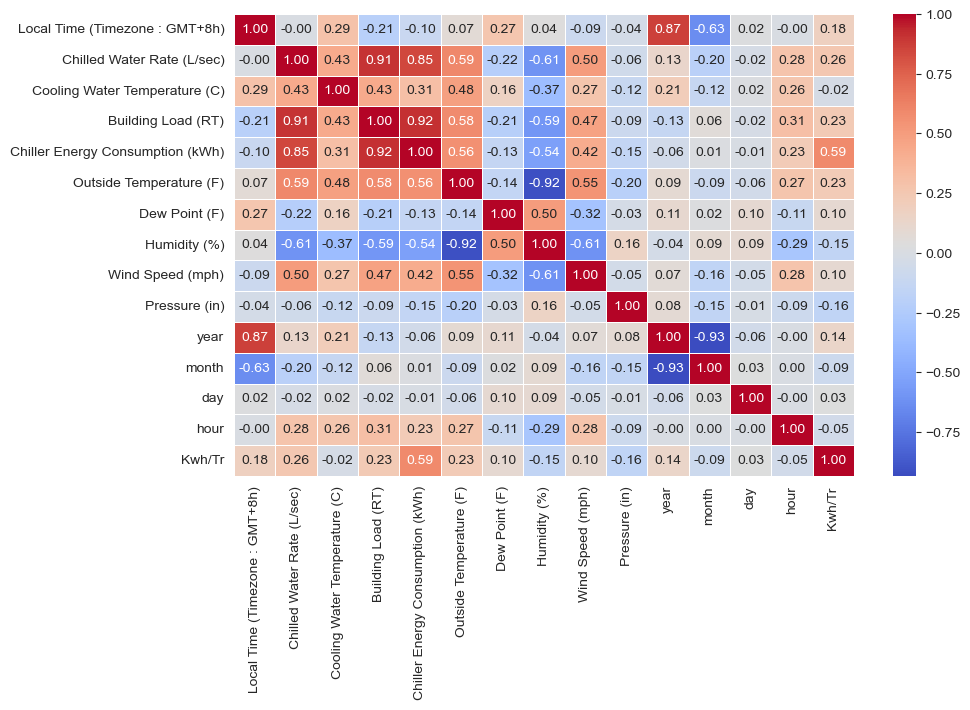

In [32]:
plt.figure(figsize=(10,6))
sbn.heatmap(chiller_data.corr(), annot=True, fmt='1.2f',linewidths=0.5,linecolor='white',cmap='coolwarm')

#### Looking at the above heatmap, we can see that chilled water rate,building load have strong correlation with our target variable-chiller energy consumption,and these are two variables are stringly correlated with each other as well

#### We will also use outside temperature,humidity and Kwh/Tr for our predictors

In [33]:
X=chiller_data[['Chilled Water Rate (L/sec)','Building Load (RT)','Outside Temperature (F)','Humidity (%)','Kwh/Tr']]
y=chiller_data['Chiller Energy Consumption (kWh)']

#### We will remove outliers from the x and y.

In [34]:
# We will do outlier treatment
# Outlier Treatment

def out_treatment(Data):
   
    if type(Data)!=pd.Series:
        data=Data.select_dtypes(include=[np.number])
        
        for i in data:
            q1=data[i].quantile(0.25)
            q3=data[i].quantile(0.75)
            iqr=q3-q1
            maxx=q3+1.5*iqr
            minn=q1-1.5*iqr
            for k in data[i]:
                if k>maxx:
                    data[i].replace(k,maxx,inplace=True)
                elif k<minn:
                    data[i].replace(k,minn,inplace=True)
    
        return data                   
        

    else :
        q1=Data.quantile(0.25)
        q3=Data.quantile(0.75)
        iqr=q3-q1
        maxx=q3+1.5*iqr
        minn=q1-1.5*iqr
        for i in Data:
            if i>maxx:
                Data=Data.replace(i,maxx)
            elif i<minn:
                Data=Data.replace(i,minn)
        return Data
    
            

In [35]:
x_cleaned=out_treatment(X)
y_cleaned=out_treatment(y)

#### We will split the data in training and testing

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_cleaned,y_cleaned,test_size=0.20,random_state=42)

#### We will scale the data

In [37]:
std_scl=StandardScaler()

x_train_scaled=std_scl.fit_transform(x_train)
x_test_scaled=std_scl.transform(x_test)

#### We will build the model with elasticnet and random forrest and will compare the results

#### 1. Random Forrest

In [38]:
# we will use gridsearch to find the best parameters
param_grid_rmf={'n_estimators':[i for i in range(1,101,10) ],
               'max_depth':[1,2,3,4],
               'max_features':['auto','sqrt']
               }

Rmf_model=RandomForestRegressor()

gscv=GridSearchCV(estimator=Rmf_model,param_grid=param_grid_rmf,scoring='neg_mean_squared_error',cv=5)

gscv.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]},
             scoring='neg_mean_squared_error')

In [39]:
print(gscv.best_params_)
print(gscv.best_score_)

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 61}
-32.23593442486292


In [48]:
# We will build the model with above parameters
Rmf_model=RandomForestRegressor(**gscv.best_params_)

Rmf_model.fit(x_train_scaled,y_train)

rmf_pred_test=Rmf_model.predict(x_test_scaled)

rmse=np.sqrt(mean_squared_error(y_test,rmf_pred_test))

print(rmse)

5.575076380600842


In [49]:
rmf_pred_train=Rmf_model.predict(x_train_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train,rmf_pred_train))

print(rmse_train)

5.753943401579206


In [51]:
r2_rmf=Rmf_model.score(x_train_scaled,y_train)
print(r2_rmf)

0.9561218719312229


                                   OLS Regression Results                                   
Dep. Variable:     Chiller Energy Consumption (kWh)   R-squared:                       0.988
Model:                                          OLS   Adj. R-squared:                  0.988
Method:                               Least Squares   F-statistic:                 1.759e+05
Date:                              Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                                      22:51:40   Log-Likelihood:                -27555.
No. Observations:                             10892   AIC:                         5.512e+04
Df Residuals:                                 10886   BIC:                         5.517e+04
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

#### 2. Elasticnet regression

In [42]:
# we will use gridsearch to find the best parameters
param_grid_rdg={'alpha':[0,1,0.1,0.01,0.001,0.02,0.02,0.05,0.5,10,20,30,40,50,60],
            'l1_ratio':[0,0.01,0.02,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

elanet=ElasticNet()

gscv_elnet=GridSearchCV(estimator=elanet,param_grid=param_grid_rdg,scoring='neg_mean_squared_error',cv=5)

gscv_elnet.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0, 1, 0.1, 0.01, 0.001, 0.02, 0.02, 0.05,
                                   0.5, 10, 20, 30, 40, 50, 60],
                         'l1_ratio': [0, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5,
                                      0.6, 0.7, 0.8, 0.9, 1]},
             scoring='neg_mean_squared_error')

In [43]:
print(gscv_elnet.best_params_)
print(gscv_elnet.best_score_)

{'alpha': 0, 'l1_ratio': 0}
-9.252500394188315


In [45]:
# We will build the model with above parameters
elanet=ElasticNet(**gscv_elnet.best_params_)

elanet.fit(x_train_scaled,y_train)

elnet_pred_test=elanet.predict(x_test_scaled)

rmse=np.sqrt(mean_squared_error(y_test,elnet_pred_test))

print(rmse)

3.147314764932155


In [47]:
elnet_pred_train=elanet.predict(x_train_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train,elnet_pred_train))

print(rmse_train)

3.037128185052149


In [58]:
r2_elasticnet=elanet.score(x_train_scaled,y_train)
print(r2_elasticnet)

0.9877751605452221


In [59]:
#lets see if we get simillar r2 adjusted

x1=sm.add_constant(x_train_scaled)
sts=sm.OLS(y_train,x1)
sts1=sts.fit()
print(sts1.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Chiller Energy Consumption (kWh)   R-squared:                       0.988
Model:                                          OLS   Adj. R-squared:                  0.988
Method:                               Least Squares   F-statistic:                 1.759e+05
Date:                              Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                                      22:53:50   Log-Likelihood:                -27555.
No. Observations:                             10892   AIC:                         5.512e+04
Df Residuals:                                 10886   BIC:                         5.517e+04
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [60]:
#lets see if we get simillar r2 adjusted

x1=sm.add_constant(x_test_scaled)
sts=sm.OLS(y_test,x1)
sts1=sts.fit()
print(sts1.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Chiller Energy Consumption (kWh)   R-squared:                       0.988
Model:                                          OLS   Adj. R-squared:                  0.988
Method:                               Least Squares   F-statistic:                 4.383e+04
Date:                              Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                                      00:00:25   Log-Likelihood:                -6975.6
No. Observations:                              2723   AIC:                         1.396e+04
Df Residuals:                                  2717   BIC:                         1.400e+04
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    